# Zillow Rent Index, 2011- 01/2017

** Data From: https://www.kaggle.com/zillow/rent-index **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
%matplotlib inline

In [2]:
df=pd.read_csv('price.csv')

In [3]:
df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13131 entries, 0 to 13130
Data columns (total 81 columns):
City Code          13131 non-null int64
City               13131 non-null object
Metro              11899 non-null object
County             13131 non-null object
State              13131 non-null object
Population Rank    13131 non-null int64
November 2010      11348 non-null float64
December 2010      11348 non-null float64
January 2011       11348 non-null float64
February 2011      11500 non-null float64
March 2011         11673 non-null float64
April 2011         11722 non-null float64
May 2011           11732 non-null float64
June 2011          11732 non-null float64
July 2011          11732 non-null float64
August 2011        11732 non-null float64
September 2011     11734 non-null float64
October 2011       11748 non-null float64
November 2011      11748 non-null float64
December 2011      11969 non-null float64
January 2012       11969 non-null float64
February 2012    

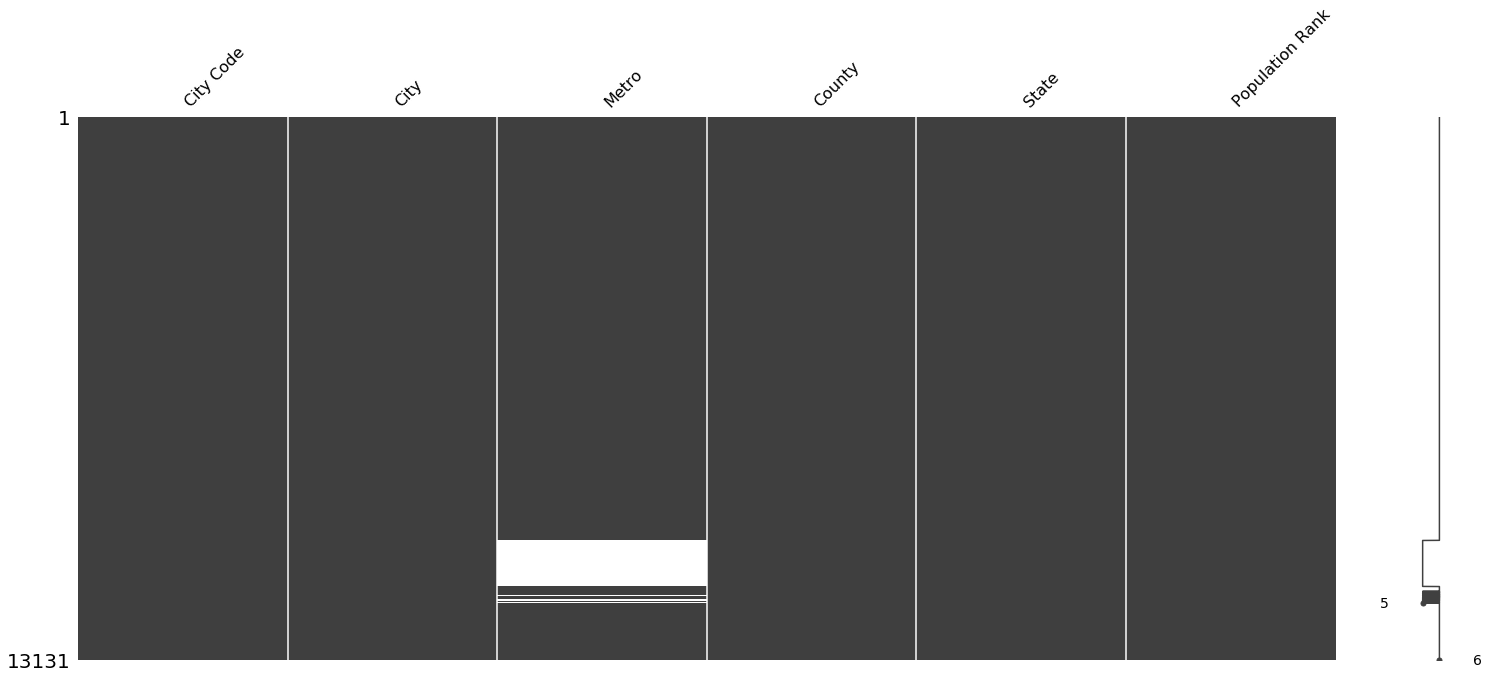

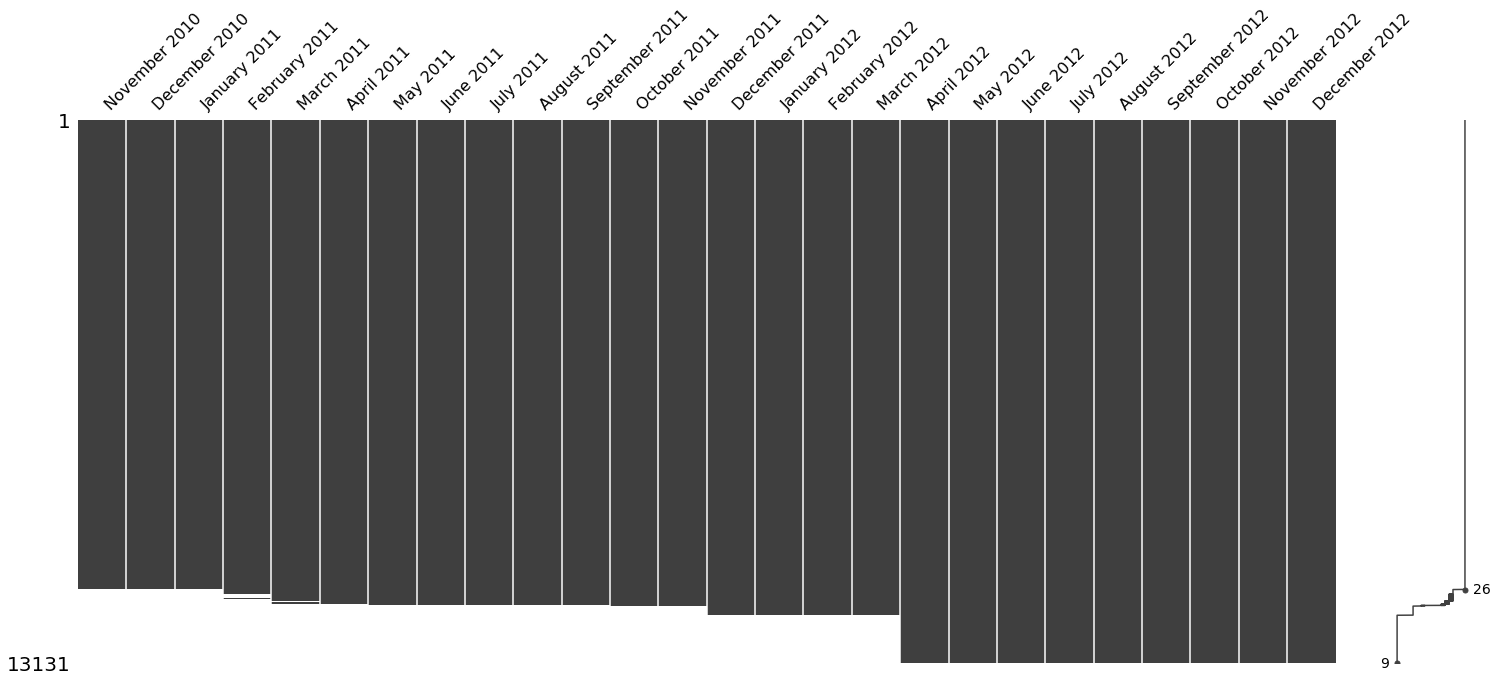

In [5]:
missing=mso.nullity_sort(df, sort='descending')
mso.matrix(missing.loc[:,:'Population Rank'])
mso.matrix(missing.loc[:,'November 2010':'December 2012'])

** Missing values from November 2010 -- March 2012 **

In [6]:
df.columns

Index(['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank',
       'November 2010', 'December 2010', 'January 2011', 'February 2011',
       'March 2011', 'April 2011', 'May 2011', 'June 2011', 'July 2011',
       'August 2011', 'September 2011', 'October 2011', 'November 2011',
       'December 2011', 'January 2012', 'February 2012', 'March 2012',
       'April 2012', 'May 2012', 'June 2012', 'July 2012', 'August 2012',
       'September 2012', 'October 2012', 'November 2012', 'December 2012',
       'January 2013', 'February 2013', 'March 2013', 'April 2013', 'May 2013',
       'June 2013', 'July 2013', 'August 2013', 'September 2013',
       'October 2013', 'November 2013', 'December 2013', 'January 2014',
       'February 2014', 'March 2014', 'April 2014', 'May 2014', 'June 2014',
       'July 2014', 'August 2014', 'September 2014', 'October 2014',
       'November 2014', 'December 2014', 'January 2015', 'February 2015',
       'March 2015', 'April 2015', 'May 2015',

In [7]:
## Extract data from January 2013 to January 2017
data=df.drop(df.loc[:,'November 2010':'December 2012'],axis=1)

In [8]:
data.head()

,City Code,City,Metro,County,State,Population Rank,January 2013,February 2013,March 2013,April 2013,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,1851,1870,1888,1901,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2194,2203,2212,2222,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1514,1511,1512,1527,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1201,1208,1218,1227,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1083,1081,1083,1089,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [9]:
price=pd.melt(data,id_vars=['City Code', 'City', 'Metro', 'County', 'State', 'Population Rank'],var_name='Time',value_name='Price')

In [10]:
price.head()

,City Code,City,Metro,County,State,Population Rank,Time,Price
0,6181,New York,New York,Queens,NY,1,January 2013,1851
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,January 2013,2194
2,17426,Chicago,Chicago,Cook,IL,3,January 2013,1514
3,39051,Houston,Houston,Harris,TX,4,January 2013,1201
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,January 2013,1083


In [11]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643419 entries, 0 to 643418
Data columns (total 8 columns):
City Code          643419 non-null int64
City               643419 non-null object
Metro              583051 non-null object
County             643419 non-null object
State              643419 non-null object
Population Rank    643419 non-null int64
Time               643419 non-null object
Price              643419 non-null int64
dtypes: int64(3), object(5)
memory usage: 39.3+ MB


In [12]:
price['Month']=price['Time'].map(lambda x: x.split()[0])
price['Year']=price['Time'].map(lambda x: x.split()[1])
price['City_State']=price['City']+', '+price['State']

In [13]:
monthMap={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
          'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
price['Month']=price['Month'].map(monthMap)

In [14]:
price.head()

,City Code,City,Metro,County,State,Population Rank,Time,Price,Month,Year,City_State
0,6181,New York,New York,Queens,NY,1,January 2013,1851,1,2013,"New York, NY"
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,January 2013,2194,1,2013,"Los Angeles, CA"
2,17426,Chicago,Chicago,Cook,IL,3,January 2013,1514,1,2013,"Chicago, IL"
3,39051,Houston,Houston,Harris,TX,4,January 2013,1201,1,2013,"Houston, TX"
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,January 2013,1083,1,2013,"Philadelphia, PA"


____
## EDA

In [15]:
Jan2017=price[price['Time']=='January 2017'][['Price','City_State']].sort_values(by='Price',ascending=False)

** Most 10 expensive cities in January 2017: **

([<matplotlib.axis.YTick at 0x1206d8cc0>,
 <a list of 10 Text yticklabel objects>)

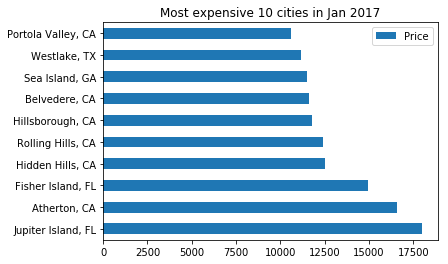

In [16]:
## Most expensive 10 cities in Jan 2017
Jan2017.head(10).plot(kind='barh',use_index=False)
plt.yticks(np.arange(10),Jan2017['City_State'])
plt.title('Most expensive 10 cities in Jan 2017')

** Lowest rent of 10 cities in January 2017: **

([<matplotlib.axis.YTick at 0x10c235d30>,
 <a list of 10 Text yticklabel objects>)

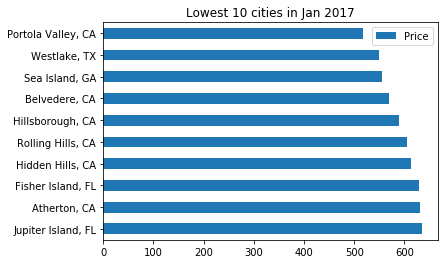

In [17]:
## Lowest 10 cities in January 2017
Jan2017.tail(10).plot(kind='barh',use_index=False)
plt.yticks(np.arange(10),Jan2017['City_State'])
plt.title('Lowest 10 cities in Jan 2017')

___
** Most 10 expensive cities in 2016: **

In [18]:
median=price.groupby(['Year','City_State'])['Price'].median().unstack('Year')

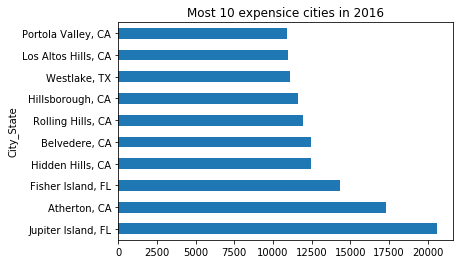

In [19]:
## Top 10 cities of 2016
median['2016'].sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Most 10 expensice cities in 2016')

** Lowest rent of 10 cities in 2016: **

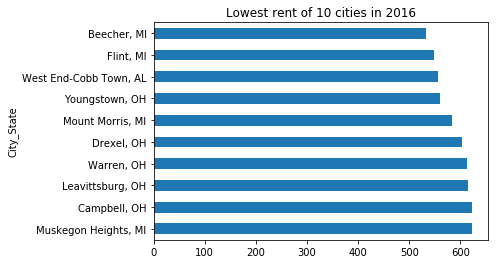

In [20]:
## Lowest 10 cities in 2016
median['2016'].sort_values(ascending=False).tail(10).plot(kind='barh')
plt.title('Lowest rent of 10 cities in 2016')

____
** Most 10 expensive metro areas in 2016:**

In [21]:
metro=price.groupby(['Year','Metro'])['Price'].median().unstack('Year')

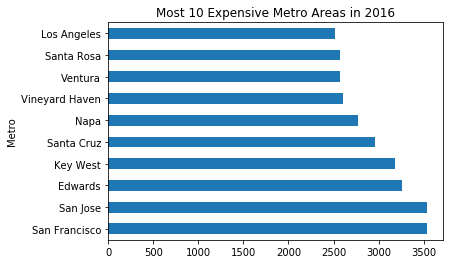

In [22]:
## Top 10 Metro in 2016
metro['2016'].sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Most 10 Expensive Metro Areas in 2016')

** Most 10 expensive metro areas in January 2017:**

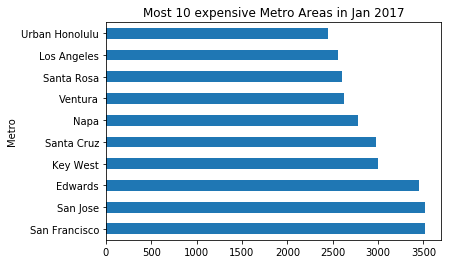

In [23]:
## Top 10 Metro in January 2017
metro['2017'].groupby('Metro').median().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Most 10 expensive Metro Areas in Jan 2017')

____
** Where have rental prices increased in the past five years and where have they remained the same? **

In [24]:
price_group=price.sort_values(by=['City Code','Year','Month'])

In [25]:
price_group.head()

,City Code,City,Metro,County,State,Population Rank,Time,Price,Month,Year,City_State
7596,3300,Aberdeen,Blackfoot,Bingham,ID,7597,January 2013,754,1,2013,"Aberdeen, ID"
20727,3300,Aberdeen,Blackfoot,Bingham,ID,7597,February 2013,742,2,2013,"Aberdeen, ID"
33858,3300,Aberdeen,Blackfoot,Bingham,ID,7597,March 2013,737,3,2013,"Aberdeen, ID"
46989,3300,Aberdeen,Blackfoot,Bingham,ID,7597,April 2013,742,4,2013,"Aberdeen, ID"
60120,3300,Aberdeen,Blackfoot,Bingham,ID,7597,May 2013,755,5,2013,"Aberdeen, ID"


In [26]:
price_group2=price.groupby(['City_State','Year'])['Price'].median().unstack('Year')

In [27]:
((price_group2['2017']-price_group2['2013'])/price_group2['2013']).sort_values(ascending=False).head(10)

City_State
Sea Island, GA             0.638269
Oakland, CA                0.607362
Bonita Springs, FL         0.581281
Otisville, MI              0.556535
Fisher Island, FL          0.553089
Saint Simons Island, GA    0.552399
Davison, MI                0.549474
Albany, CA                 0.543004
Hilton Head Island, SC     0.534459
Emeryville, CA             0.526134
dtype: float64

In [28]:
((price_group2['2016']-price_group2['2015'])/price_group2['2015']).sort_values(ascending=False).head(10)

City_State
Lohman, MO                 0.294643
Plandome, NY               0.285236
Freeport, TX               0.246043
Mazon, IL                  0.235867
Gardner, IL                0.234375
Pepper Pike, OH            0.220886
Mount Crested Butte, CO    0.220469
Coal City, IL              0.217949
Grand Ridge, FL            0.217326
Put in Bay, OH             0.215183
dtype: float64

___
** The change of most 5 expensive metro areas rent from January 2013 to January 2017:**

In [29]:
index=metro['2016'].sort_values(ascending=False).head(5).index

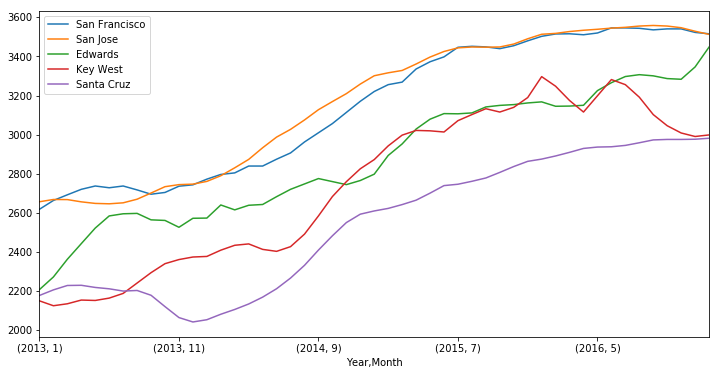

In [30]:
plt.figure(figsize=(12,6))
for name in index.values:
    price[price['Metro']==name].groupby(['Year','Month'])['Price'].median().plot(label=name)
    plt.legend()

____
** Cities where rent prices have remained the same from 2015 to 2016:**

In [31]:
remained=(price_group2['2016']-price_group2['2015'])/price_group2['2015']

In [32]:
remained[remained==0].index.tolist()

['Alexandria, VA',
 'Ancram, NY',
 'Bald Knob, AR',
 'Bingham Farms, MI',
 'Blackville, SC',
 'Bradford, TN',
 'Bressler-Enhaut-Oberlin, PA',
 'Bucyrus, OH',
 'Cleveland, OH',
 'Darwin, MN',
 'Denton, NC',
 'Dinuba, CA',
 'Dinwiddie, VA',
 'District Heights, MD',
 'Fairbury, IL',
 'Fredericksburg, VA',
 'Freeland, PA',
 'Fruita, CO',
 'Fulton, PA',
 'Gibbsboro, NJ',
 'Glassport, PA',
 'Greenwood, AR',
 'Harleton, TX',
 'Hedgesville, WV',
 'Holland, OH',
 'Hurricane, WV',
 'Lackawaxen, PA',
 'Lebanon Junction, KY',
 'Lincoln Park, MI',
 'Luther, MI',
 'Lyndhurst, NJ',
 'Mc David, FL',
 'McKeesport, PA',
 'Mendon, MI',
 'Midfield, AL',
 'Milford, DE',
 'Mountain Lake Park, MD',
 'Needles, CA',
 'North Lewisburg, OH',
 'Oxford, MS',
 'Plattsmouth, NE',
 'Pleasantville, NY',
 'Ridgefield, NJ',
 'Saint Charles, MI',
 'Shillington, PA',
 'Sinking Spring, PA',
 'Steelton, PA',
 'Sugar Creek, WI',
 'Tarrant, AL',
 'Trafalgar, IN',
 'Wallisville, TX',
 'Ward, AR',
 'Waterville, ME',
 'Wellston,